2.5 Norms

In [1]:
import numpy as np
from numpy import linalg
from numpy.linalg import norm

In [2]:
def l_p_norm(vec, p=2):
    return np.power(np.power(vec, p).sum(), 1/p)

In [3]:
l_p_norm([1,2,3,4])

5.477225575051661

In [4]:
norm([1,2,3,4])

5.477225575051661

In [5]:
def l_1_norm(vec):
    return np.sum(np.absolute(vec))

In [6]:
l_1_norm([1,2,3,-4])

10

In [7]:
def max_norm(vec):
    return np.max(np.absolute(vec))

In [8]:
max_norm([1,2,3,-4])

4

In [9]:
def cos_similarity(x, y):
    return np.dot(x, y)/(l_p_norm(x) * l_p_norm(y, 2))

In [10]:
cos_similarity([1,2,3,-4], [1,2,3,-4])

1.0

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(np.array([1,2,3,-4]).reshape(1, -1), np.array([1,2,3,-4]).reshape(1, -1))

array([[1.]])

In [12]:
np.dot([0,2,4,1], [1,2,3,-4])/(norm([0,2,4,1])*norm([1,2,3,-4]))

0.4780914437337575

In [13]:
cos_similarity([0,2,4,1], [1,2,3,-4])

0.4780914437337575

In [14]:
from scipy import spatial
1-spatial.distance.cosine([0,2,4,1], [1,2,3,-4])

0.47809144373375756

In [15]:
def frobenius_norm(mat):
    return l_p_norm(mat, p=2)

In [16]:
c = np.array([[1,2,3],[4,5,6]])
c

array([[1, 2, 3],
       [4, 5, 6]])

In [17]:
frobenius_norm(c)

9.539392014169456

In [18]:
np.sqrt(np.trace(c@c.T))

9.539392014169456

In [19]:
norm(c, 'fro')

9.539392014169456

2.7 Eigendecomposition

In [20]:
import matplotlib.pyplot as plt

def plot_2d_vecs(vecs, title=None, colors=None, scale_=20):
    origin = [0], [0] 

    plt.quiver(*origin, *[vecs[:,i] for i in range(vecs.shape[1])], color=colors, scale=scale_)
    plt.title(title)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.show()

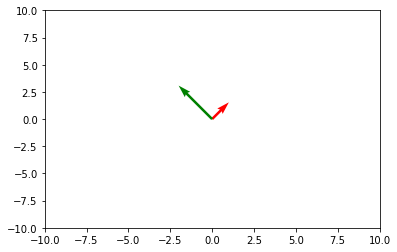

In [21]:
stacked_vecs = np.array([[1,1],[-2,2]])

plot_2d_vecs(stacked_vecs, colors=['r','g'])

In [22]:
A = (np.random.rand(2, 2)*5)
A

array([[1.03940834, 4.4698908 ],
       [1.73766665, 0.57997211]])

In [23]:
x = [2,3]

In [24]:
A@x

array([15.48848907,  5.21524963])

In [25]:
np.stack([A@x, x]).T

array([[15.48848907,  2.        ],
       [ 5.21524963,  3.        ]])

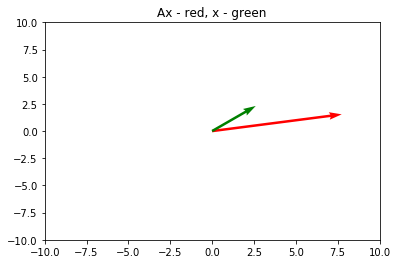

In [26]:
plot_2d_vecs(np.stack([A@x, x]).T, title='Ax - red, x - green', colors=['r','g'], scale_=40)

In [27]:
w, v = linalg.eig(A)
w, v 

(array([ 3.60610768, -1.98672723]), array([[ 0.86719857, -0.82807822],
        [ 0.4979625 ,  0.56061257]]))

In [28]:
v[:,0]

array([0.86719857, 0.4979625 ])

In [29]:
A@v[:,0]

array([3.1272114 , 1.79570638])

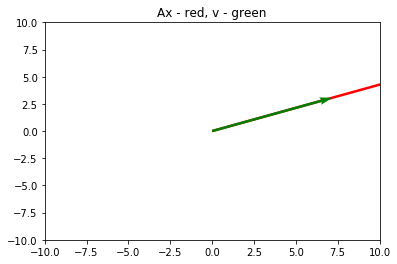

In [30]:
# As we can see the Av only scales the eigenvector v, but doesn't rotate
plot_2d_vecs(np.stack([A@(v[:,0]), v[:,0]]).T, title='Ax - red, v - green', colors=['r','g'], scale_=5)

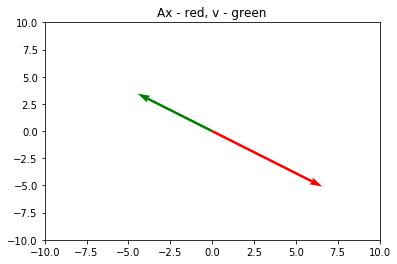

In [31]:
# As we can see the Av only scales the eigenvector v, but doesn't rotate
plot_2d_vecs(np.stack([A@(v[:,1]), v[:,1]]).T, title='Ax - red, v - green', colors=['r','g'], scale_=5)

In [32]:
eigvals, eigvecs = linalg.eig(A)
lambda_mat = np.diag(eigvals)
eigvecs @ lambda_mat @ np.linalg.inv(eigvecs)

array([[1.03940834, 4.4698908 ],
       [1.73766665, 0.57997211]])

In [33]:
A

array([[1.03940834, 4.4698908 ],
       [1.73766665, 0.57997211]])

Ax = lx                                                                                                                   
(A - lI)x = 0                                                                                                            
det(A - lI) = 0

In [34]:
import sympy 
from sympy import *

def find_eigenvals(mat):
    assert mat.shape[0] == mat.shape[1]

    l = sympy.symbols('lamda')

    M = np.copy(mat) - sympy.diag(*([l]*mat.shape[0]))
    det_polynom = M.det()
    
    eigenvals = solve(det_polynom)
    
    if (mat == mat.T).all() or np.array([np.abs(im(e)) for e in eigenvals]).sum()/len(eigvals) < 0.1:
        return np.array([re(e) for e in eigenvals])
    return eigenvals

In [35]:
eigenvals = find_eigenvals(A)

In [36]:
eigenvals

array([-1.98672723106620, 3.60610767709977], dtype=object)

In [37]:
np.linalg.eigvals(A)

array([ 3.60610768, -1.98672723])

In [38]:
S = np.array([[2,1],[1,2]])

In [39]:
eig_vals_S = find_eigenvals(S)

In [40]:
eig_vals_S

array([1, 3], dtype=object)

In [41]:
np.linalg.eigvals(S)

array([3., 1.])

In [42]:
# Two checks: 
# 1. sum of eigvals must be equal to the trace
# 2. product of eigvals must be equal to the determinant

def check_eigvals(mat, eigvals):
    valid = True
    if np.trace(mat) == np.sum(eigvals):
        print('First check passed: The sum of eigvals is equal to the trace of the matrix.', np.trace(mat))
    else:
        valid = False
        print('First check didn\'t pass: The sum of eigvals is not equal to the trace of the matrix.', np.trace(mat), np.sum(eig_vals_S))
    if np.abs(np.linalg.det(mat) - np.prod(eigvals)) < 0.01:
        print('Second check passed: The product of eigvals is equal to the determinant of the matrix.', np.prod(eig_vals_S))
    else:
        valid = False
        print('Second check didn\'t pass: The product of eigvals is not equal to the determinant of the matrix.', np.prod(eig_vals_S), np.linalg.det(mat))
    if valid:
        print('Eigenvalues computed correctly')
    else:
        print('Wrong eigenvalues')

In [43]:
check_eigvals(S, eig_vals_S)

First check passed: The sum of eigvals is equal to the trace of the matrix. 4
Second check passed: The product of eigvals is equal to the determinant of the matrix. 3
Eigenvalues computed correctly


In [44]:
# an example where the eigvals are complex numbers
Q = np.array([[0,-1],[1,0]])
Q

array([[ 0, -1],
       [ 1,  0]])

In [45]:
find_eigenvals(Q)

[-I, I]

In [46]:
check_eigvals(Q, find_eigenvals(Q))

First check passed: The sum of eigvals is equal to the trace of the matrix. 0
Second check passed: The product of eigvals is equal to the determinant of the matrix. 3
Eigenvalues computed correctly


In [47]:
eig_vals_S, V_S = np.linalg.eig(S)
eig_vals_S, V_S

(array([3., 1.]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [48]:
# identity
V_S@V_S.T

array([[1., 0.],
       [0., 1.]])

In [49]:
eig_vals_A, V_A = np.linalg.eig(A)
eig_vals_A, V_A

(array([ 3.60610768, -1.98672723]), array([[ 0.86719857, -0.82807822],
        [ 0.4979625 ,  0.56061257]]))

In [50]:
A

array([[1.03940834, 4.4698908 ],
       [1.73766665, 0.57997211]])

In [51]:
# not orthonormal columns in V_A
V_A@V_A.T

array([[ 1.4377469, -0.0323987],
       [-0.0323987,  0.5622531]])

In [52]:
eig_vals_Q, V_Q = np.linalg.eig(Q)
eig_vals_Q, V_Q

(array([0.+1.j, 0.-1.j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        -0.70710678j, 0.        +0.70710678j]]))

In [53]:
V_Q@V_Q.T

array([[ 1.+0.00000000e+00j,  0.+2.23711432e-17j],
       [ 0.+2.23711432e-17j, -1.+0.00000000e+00j]])

In [54]:
# Similar Matrices have the same eigvals

A = (np.random.rand(3, 3)*5).round()
B = (np.random.rand(3, 3)*5).round()

sim_to_A = B@A@linalg.inv(B)

In [55]:
A

array([[1., 2., 3.],
       [3., 1., 0.],
       [1., 1., 3.]])

In [56]:
sim_to_A

array([[ 2.25  ,  0.125 ,  2.9375],
       [ 8.    , -5.5   , 11.75  ],
       [ 5.    , -4.5   ,  8.25  ]])

In [57]:
find_eigenvals(A)

array([-1.35746253689877, 1.31477975259916, 5.04268278429961],
      dtype=object)

In [58]:
find_eigenvals(sim_to_A)

array([-1.35746253689877, 1.31477975259916, 5.04268278429961],
      dtype=object)

In [60]:
# A@B  and B@A have the same nonzero eigvalues
find_eigenvals(A@B), find_eigenvals(B@A)

(array([0.765899517791250, 6.55602679086579, 28.6780736913430],
       dtype=object),
 array([0.765899517791250, 6.55602679086579, 28.6780736913430],
       dtype=object))

In [61]:
# symmetric positive definite
def check_SPD(mat):
    if not (mat == mat.T).all():
        print ('Not a symmetric matrix')
        return False
    
    # first check by eigenvals
    eig_v = find_eigenvals(mat)
    firt_check_res =  all(np.array(eig_v) > 0)
    return firt_check_res
    # second check - x.T@mat@x > 0 for all x
    # third check  - all leading determinants are > 0
    # forth check  - all pivots in elimination are > 0

In [62]:
check_SPD(S)

True

In [63]:
check_SPD(A)

Not a symmetric matrix


False

In [64]:
check_SPD(Q)

Not a symmetric matrix


False

In [65]:
np.linalg.eig(np.array([[5,1],[0,5]]))

(array([5., 5.]), array([[ 1.00000000e+00, -1.00000000e+00],
        [ 0.00000000e+00,  1.11022302e-15]]))

2.8 Singular Value Decomposition

In [66]:
# Au = cv          
# A = U@E@V.T
# A.T@A = V@E.T@U.T@U@E@V.T = V@E.T@E@V.T
# A@A.T = U@E@V.T@V@E.T@U.T = U@E@E.T@U.T 
# => U - eigenvectors of A@A.T
# => V - eigenvectors of A.T@A
# => E - sqrt(eigenvalues of A.T@A or A@A.T)

In [67]:
def find_sing_vals(mat):
    return np.sqrt(np.array(find_eigenvals(mat@mat.T), dtype=float))

In [68]:
np.array(find_eigenvals(A@A.T))

array([0.394448724536011, 7.60555127546399, 27.0000000000000],
      dtype=object)

In [69]:
np.linalg.eig(A@A.T)

(array([27.        ,  0.39444872,  7.60555128]),
 array([[-0.70436073, -0.66902022,  0.23725074],
        [-0.35218036,  0.03917067, -0.93511211],
        [-0.61631563,  0.74221129,  0.26320607]]))

In [70]:
sing_vals_A = find_sing_vals(A)

In [71]:
U, E, V = np.linalg.svd(A)

In [72]:
np.sort(E)

array([0.62805153, 2.7578164 , 5.19615242])

In [73]:
np.sort(sing_vals_A)

array([0.62805153, 2.7578164 , 5.19615242])

In [74]:
(U@np.diag(E)@V).round()

array([[ 1.,  2.,  3.],
       [ 3.,  1., -0.],
       [ 1.,  1.,  3.]])

In [75]:
A

array([[1., 2., 3.],
       [3., 1., 0.],
       [1., 1., 3.]])

In [82]:
def svd_wrapper(mat):
    A_tA = np.matmul(mat, mat.T)
    AA_t = np.matmul(mat.T, mat)
    E_1, U = linalg.eig(A_tA)
    E_2, V = linalg.eig(AA_t)
#     assert np.allclose((U@U.T), np.eye((U@U.T).shape[0]))
#     assert np.allclose((V@V.T), np.eye((V@V.T).shape[0]))
#     assert np.allclose(np.sqrt(E_1), np.sqrt(E_2))
    
    return U, np.sqrt(E_1), V.T

In [83]:
svd_wrapper(A)

(array([[-0.70436073, -0.66902022,  0.23725074],
        [-0.35218036,  0.03917067, -0.93511211],
        [-0.61631563,  0.74221129,  0.26320607]]),
 array([5.19615242, 0.62805153, 2.7578164 ]),
 array([[-0.45749571, -0.45749571, -0.76249285],
        [-0.83576249, -0.07158002,  0.54440551],
        [ 0.30364244, -0.88632611,  0.3496102 ]]))

In [85]:
# difference only is the sign of the eigenvecs
np.linalg.svd(A)

(array([[-0.70436073,  0.23725074, -0.66902022],
        [-0.35218036, -0.93511211,  0.03917067],
        [-0.61631563,  0.26320607,  0.74221129]]),
 array([5.19615242, 2.7578164 , 0.62805153]),
 array([[-0.45749571, -0.45749571, -0.76249285],
        [-0.83576249, -0.07158002,  0.54440551],
        [ 0.30364244, -0.88632611,  0.3496102 ]]))

In [86]:
# As we see for a symmetric positive definite matrix The SVD decomposition and eigendecomposition is the same

In [87]:
svd_wrapper(S)

(array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]),
 array([3., 1.]),
 array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))

In [88]:
np.linalg.svd(S)

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]),
 array([3., 1.]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

In [89]:
np.linalg.eig(S)

(array([3., 1.]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [90]:
C = np.array([[25,20], [20, 25]])
C

array([[25, 20],
       [20, 25]])

In [91]:
svd_wrapper(C)

(array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]),
 array([45.,  5.]),
 array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))

In [92]:
np.linalg.svd(C)

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]),
 array([45.,  5.]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

In [93]:
# For orthogonal matrices all the singular values are 1
# because
# A.T@A = Q.T@Q = I. E = I

In [94]:
Q

array([[ 0, -1],
       [ 1,  0]])

In [95]:
Q@Q.T

array([[1, 0],
       [0, 1]])

In [96]:
svd_wrapper(Q)

(array([[1., 0.],
        [0., 1.]]), array([1., 1.]), array([[1., 0.],
        [0., 1.]]))

In [97]:
np.linalg.svd(Q)

(array([[ 0., -1.],
        [-1.,  0.]]), array([1., 1.]), array([[-1., -0.],
        [ 0.,  1.]]))

In [98]:
# The geometry of SVD

In [99]:
U, E, V = svd_wrapper(C)

In [100]:
x = (np.random.rand(2)*5)
x

array([0.03768658, 4.48544416])

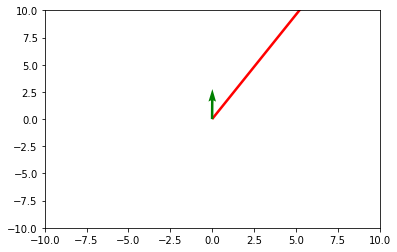

In [101]:
# stacked_vecs = np.array([[1,1],[-2,2]])

plot_2d_vecs(np.array([C@x, x]), colors=['r', 'g'], scale_=50)

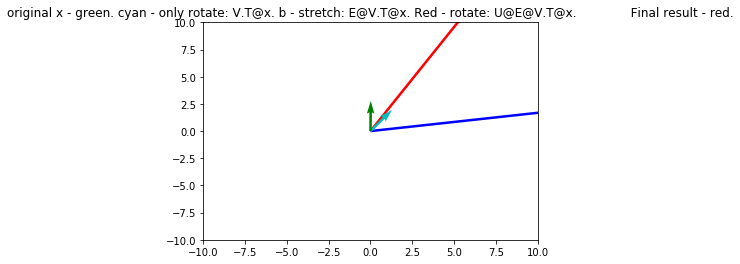

In [102]:
plot_2d_vecs(np.array([U@np.diag(E)@V@x,np.diag(E)@V@x, V@x, x]), \
             title='original x - green. cyan - only rotate: V.T@x. b - stretch: E@V.T@x. Red - rotate: U@E@V.T@x. \
             Final result - red.', colors=['r', 'b', 'c', 'g'], scale_=50)

In [103]:
np.array([U@np.diag(E)@V@x, np.diag(E)@V@x, V@x, x])

array([[9.06510477e+01, 1.12889836e+02],
       [1.43925139e+02, 1.57251977e+01],
       [3.19833642e+00, 3.14503954e+00],
       [3.76865814e-02, 4.48544416e+00]])

In [104]:
C@x

array([ 90.65104772, 112.8898356 ])

In [105]:
def pseudo_inverse(mat):
    # A_pseudo = V@E^(-1)@U.T
    U_, E_, V_ = svd_wrapper(mat)
#     (linalg.svd(A)[2].T@linalg.inv(np.diag(E_))@linalg.svd(A)[0].T).round(1)
    return V_.T@linalg.inv(np.diag(E_))@U_.T

In [106]:
pseudo_inverse(A)

array([[ 0.97841786, -0.12407572, -0.90443429],
       [ 0.0620155 ,  0.32707621, -0.11491841],
       [-0.44648224, -0.0329114 ,  0.76716717]])

In [107]:
pseudo_inverse(S)

array([[ 0.66666667, -0.33333333],
       [-0.33333333,  0.66666667]])

In [108]:
pseudo_inverse(np.eye(10))

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [109]:
svd_wrapper(A)

(array([[-0.70436073, -0.66902022,  0.23725074],
        [-0.35218036,  0.03917067, -0.93511211],
        [-0.61631563,  0.74221129,  0.26320607]]),
 array([5.19615242, 0.62805153, 2.7578164 ]),
 array([[-0.45749571, -0.45749571, -0.76249285],
        [-0.83576249, -0.07158002,  0.54440551],
        [ 0.30364244, -0.88632611,  0.3496102 ]]))

In [110]:
U_, E_, V_ = svd_wrapper(A)
(V_@linalg.inv(np.diag(E_))@U_).round(1)

array([[ 0.5, -0.2,  0.6],
       [ 0. ,  0.2,  0.1],
       [ 0.4, -0. ,  1.4]])

2.12 Principal Components Analysis

In [134]:
n = 50
x = np.arange(-n/2, n/2, 1, dtype=np.float64)

m = np.random.uniform(0.3, 0.8, (n,))
b = np.random.uniform(5, 10, (n,))

y = x*m + b 

In [135]:
A = np.stack([x,y])

In [136]:
A.mean(1)

array([-0.5       ,  6.94055256])

In [137]:
A[0,:] = A[0,:] - A.mean(1)[0]
A[1,:] = A[1,:] - A.mean(1)[1]

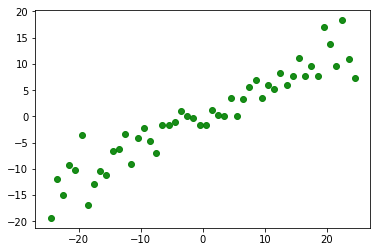

In [138]:
plt.scatter(A[0,:], A[1,:], s=None, marker='o', color='g', edgecolors='g', alpha=0.9)

In [139]:
U, E, V_T = svd_wrapper(A)

In [140]:
cov_mat_A = A@A.T/A.shape[1]

In [141]:
cov_mat_A

array([[208.25      , 116.65216606],
       [116.65216606,  73.38685886]])

In [142]:
# The problem states:
# Find an orthogonal P such that:
# Y = PA and cov_mat_Y - is a diagonal matrix (high variance and low covariance)
# cov_mat_A = U@E^(2)@U.T = QLQ.T
# the principal components of A are the columns Q (eigenvectors of the cov. matrix AA.T)

In [143]:
U[:,0] # the same first principal component

array([0.8661578 , 0.49977062])

In [144]:
first_princ_comp = linalg.eig(cov_mat_A)[1][:,0]
first_princ_comp

array([0.8661578 , 0.49977062])

In [145]:
linalg.eig(cov_mat_A)[1]

array([[ 0.8661578 , -0.49977062],
       [ 0.49977062,  0.8661578 ]])

In [146]:
second_princ_comp = U[:,1]
second_princ_comp

array([-0.49977062,  0.8661578 ])

In [147]:
(first_princ_comp@second_princ_comp).round(2)

-0.0

In [148]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(A[0, :].reshape(-1, 1), A[1,:].reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

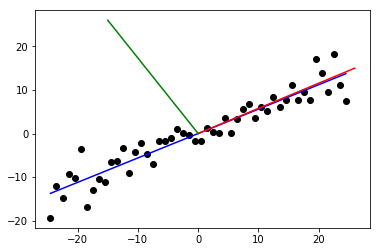

In [149]:
# We can see at the image that
# Linear regression line (blue) and and the first principal component line (red) fits the date very well (although they differ: first principal component is the best "othogonal" regression)
# The two principal components are orthogonal to each other

plt.scatter(A[0,:].reshape(-1, 1), A[1,:].reshape(-1, 1),  color='black')
plt.plot(A[0,:].reshape(-1, 1), reg.predict(A[0,:].reshape(-1, 1)), color='blue')
plt.plot([0, first_princ_comp[0]*30], [0, first_princ_comp[1]*30], '-', color='red')
plt.plot([0, second_princ_comp[0]*30], [0, second_princ_comp[1]*30], '-', color='green')
plt.show()

In [151]:
U

array([[ 0.8661578 , -0.49977062],
       [ 0.49977062,  0.8661578 ]])

In [152]:
E

array([117.37929392,  17.43399843])

In [153]:
V_T

array([[-0.26313763+0.j, -0.22452096+0.j, -0.22945099+0.j, ...,
         0.24401545+0.j,  0.22035275+0.j,  0.21225447+0.j],
       [ 0.25857186+0.j, -0.07726169+0.j,  0.09503622+0.j, ...,
        -0.26498387+0.j,  0.12589906+0.j,  0.33516611+0.j],
       [-0.25245722+0.j,  0.28777551+0.j, -0.29911426+0.j, ...,
        -0.28179794+0.j, -0.14560202+0.j, -0.01697217+0.j],
       ...,
       [ 0.00211017+0.j, -0.00229207+0.j, -0.01641167+0.j, ...,
         0.00931706+0.j,  0.01409833+0.j, -0.02906312+0.j],
       [ 0.00281173+0.j, -0.00181959+0.j,  0.03198594+0.j, ...,
         0.00528821+0.j, -0.02752537+0.j,  0.01531056+0.j],
       [ 0.00348374+0.j,  0.00175902+0.j,  0.00088112+0.j, ...,
         0.00671589+0.j, -0.00472885+0.j,  0.01267281+0.j]])

In [165]:
sigma = np.zeros((E.shape[0], V_T.shape[0]))

In [166]:
sigma[0,0] = E[0]
sigma[1,1] = E[1]

In [289]:
# sigma_2 = np.copy(sigma)
# sigma_2[1:,:] = 0

# U_2 = np.copy(U)
# U_2[:,1] = 0

# V_T_2 = np.copy(V_T)
# V_T_2[1:,:] = 0

In [298]:
# (U_2@sigma_2@V_T_2)

array([[-26.75293671+0.j, -22.82681891+0.j, -23.32805056+0.j,
        -20.10823388+0.j, -19.79752306+0.j, -16.20101926+0.j,
        -21.15904568+0.j, -18.73338319+0.j, -16.86668688+0.j,
        -16.46616693+0.j, -13.74377221+0.j, -12.8175604 +0.j,
        -10.82467996+0.j, -12.54333078+0.j,  -9.68840796+0.j,
         -8.11092448+0.j,  -8.40658991+0.j,  -8.66734287+0.j,
         -5.61309966+0.j,  -4.8575191 +0.j,  -3.81586842+0.j,
         -2.19834883+0.j,  -1.82648267+0.j,  -1.29901641+0.j,
         -1.07036205+0.j,  -0.36872957+0.j,   1.67393163+0.j,
          1.99824592+0.j,   2.66493476+0.j,   4.90944315+0.j,
          4.15784918+0.j,   6.34544208+0.j,   8.03795834+0.j,
          9.34673808+0.j,   8.6362594 +0.j,  10.46650708+0.j,
         10.90556571+0.j,  12.96858453+0.j,  12.72526171+0.j,
         14.18237584+0.j,  16.43533985+0.j,  15.69732353+0.j,
         17.27955601+0.j,  17.19899212+0.j,  22.01382047+0.j,
         21.37681173+0.j,  20.2794156 +0.j,  24.80880452+0.j,
        

In [317]:
A_rank_one_approx = np.real(sigma[0,0]*(U[:,0].reshape(-1,1)@V_T[0,:].reshape(1,-1))).round(1)

In [318]:
A_rank_one_approx

array([[-26.8, -22.8, -23.3, -20.1, -19.8, -16.2, -21.2, -18.7, -16.9,
        -16.5, -13.7, -12.8, -10.8, -12.5,  -9.7,  -8.1,  -8.4,  -8.7,
         -5.6,  -4.9,  -3.8,  -2.2,  -1.8,  -1.3,  -1.1,  -0.4,   1.7,
          2. ,   2.7,   4.9,   4.2,   6.3,   8. ,   9.3,   8.6,  10.5,
         10.9,  13. ,  12.7,  14.2,  16.4,  15.7,  17.3,  17.2,  22. ,
         21.4,  20.3,  24.8,  22.4,  21.6],
       [-15.4, -13.2, -13.5, -11.6, -11.4,  -9.3, -12.2, -10.8,  -9.7,
         -9.5,  -7.9,  -7.4,  -6.2,  -7.2,  -5.6,  -4.7,  -4.9,  -5. ,
         -3.2,  -2.8,  -2.2,  -1.3,  -1.1,  -0.7,  -0.6,  -0.2,   1. ,
          1.2,   1.5,   2.8,   2.4,   3.7,   4.6,   5.4,   5. ,   6. ,
          6.3,   7.5,   7.3,   8.2,   9.5,   9.1,  10. ,   9.9,  12.7,
         12.3,  11.7,  14.3,  12.9,  12.5]])

In [319]:
A

array([[-24.5       , -23.5       , -22.5       , -21.5       ,
        -20.5       , -19.5       , -18.5       , -17.5       ,
        -16.5       , -15.5       , -14.5       , -13.5       ,
        -12.5       , -11.5       , -10.5       ,  -9.5       ,
         -8.5       ,  -7.5       ,  -6.5       ,  -5.5       ,
         -4.5       ,  -3.5       ,  -2.5       ,  -1.5       ,
         -0.5       ,   0.5       ,   1.5       ,   2.5       ,
          3.5       ,   4.5       ,   5.5       ,   6.5       ,
          7.5       ,   8.5       ,   9.5       ,  10.5       ,
         11.5       ,  12.5       ,  13.5       ,  14.5       ,
         15.5       ,  16.5       ,  17.5       ,  18.5       ,
         19.5       ,  20.5       ,  21.5       ,  22.5       ,
         23.5       ,  24.5       ],
       [-19.34095815, -12.0043132 , -14.89532305,  -9.19030987,
        -10.20564502,  -3.63044397, -16.8171305 , -12.94669915,
        -10.36754   , -11.17540638,  -6.61949159,  -6.21295306,
   

In [322]:
# The Eckart-Young theorem says that best rank 1 approximation of A is the A_k (above): the first component of the SVD

In [323]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(A.T)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [324]:
# We see that it's the same as the sklearn's implementation of PCA

In [325]:
pca.components_

array([[-0.8661578 , -0.49977062],
       [-0.49977062,  0.8661578 ]])

In [326]:
first_princ_comp

array([0.8661578 , 0.49977062])

In [327]:
second_princ_comp

array([-0.49977062,  0.8661578 ])

Matrix Norms (revisited)

In [347]:
# spectral norm max||Ax||/||x|| = sigma[0]
def spec_norm(mat):
    return np.sort(find_sing_vals(mat))[-1]

In [348]:
spec_norm(A), linalg.norm(A, 2)

(117.37929392215581, 117.37929392215582)

{\displaystyle \|A\|_{\text{F}}={\sqrt {\sum _{i=1}^{m}\sum _{j=1}^{n}|a_{ij}|^{2}}}={\sqrt {\operatorname {trace} \left(A^{*}A\right)}}={\sqrt {\sum _{i=1}^{\min\{m,n\}}\sigma _{i}^{2}(A)}},} - https://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm

In [378]:
# frobenius norm max||Ax||/||x|| = sigma[0]
def frob_norm(mat):
    return np.sqrt(np.sum([c**2 for c in mat.flatten()])), np.sqrt(np.sum([c**2 for c in find_sing_vals(mat)])), np.sqrt(np.trace(mat@mat.T))

In [379]:
frob_norm(A),  linalg.norm(A, 'fro')

((118.66694123869962, 118.66694123869962, 118.66694123869962),
 118.66694123869962)

In [380]:
# nuclear norm 
def nuc_norm(mat):
    return np.sum(find_sing_vals(mat))

In [381]:
nuc_norm(A),  linalg.norm(A, 'nuc')

(134.813292352956, 134.8132923529561)

In [ ]:
# The following tree norms are the minimal among all the rank one matrices B: ||A-A_rank_one_approx|| < ||A-B||

In [382]:
frob_norm(A - A_rank_one_approx)

(17.458416293461227, 17.45841629346124, 17.45841629346123)

In [383]:
nuc_norm(A - A_rank_one_approx)

17.646847090852493

In [384]:
spec_norm(A - A_rank_one_approx)

17.457388259039234